In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
PATH = "../abalone.data"

data = pd.read_csv(PATH, header= None, index_col= False)

data.columns = [
    'sex', 'length', 'diameter', 'height', 'whole_weight',
    'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'
]

In [3]:
data.head()

sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [4]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

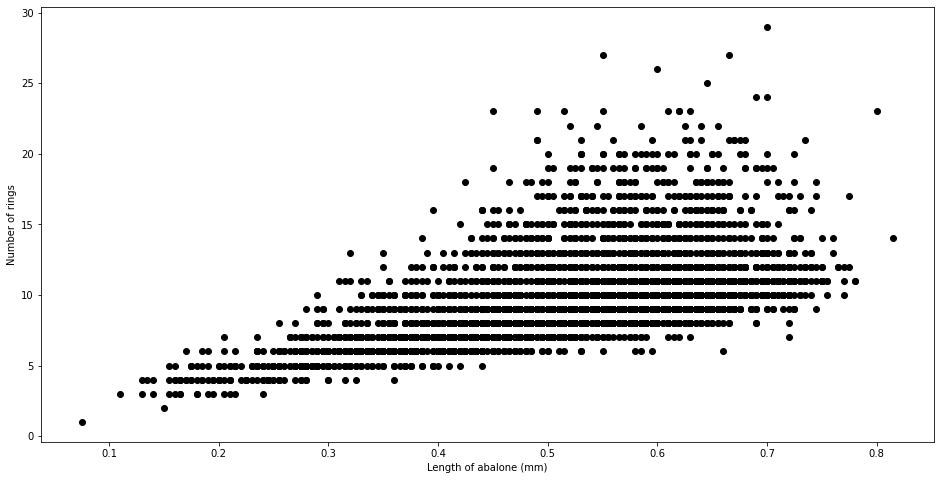

In [5]:
plt.figure(figsize=(16, 8))
plt.scatter(data['length'], data['rings'], c= 'black')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

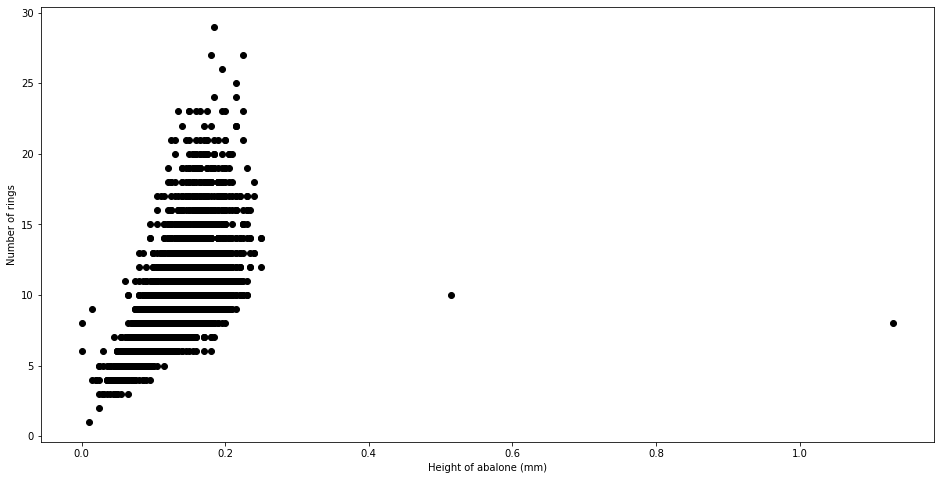

In [6]:
plt.figure(figsize=(16, 8))
plt.scatter(data['height'], data['rings'], c= 'black')
plt.xlabel('Height of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

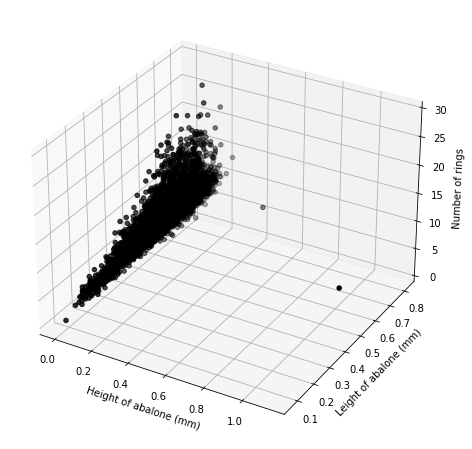

In [7]:
fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection = '3d')

ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Leight of abalone (mm)')
ax.set_zlabel('Number of rings')
ax.scatter3D(data['height'], data['length'], data['rings'], c= 'black')
plt.show()

In [8]:
# Feature engineer
encod_data = pd.get_dummies(data)
encod_data.head()

length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  sex_F  sex_I  sex_M  
0         0.150     15      0      0      1  
1         0.070      7      0      0      1  
2         0.210      9      1      0      0  
3         0.155     10      0      0      1  
4         0.055      7      0      1      0

In [9]:
encod_data.shape

(4177, 11)

In [10]:
# train, test, validation set splitting
train_set = encod_data.iloc[:4099, :]
valid_set = encod_data.iloc[4099:, :]

In [11]:
print(train_set.shape)
print(valid_set.shape)

(4099, 11)
(78, 11)


### **Regression** 

In [12]:
# Model (Multiple Linear Regression)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [13]:
X = train_set[['length', 'height']]
y = train_set['rings'].values.reshape(-1, 1)

X_val = valid_set[['length', 'height']]
y_val = valid_set['rings'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size= 0.1, 
                                                    random_state= 42)

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
prediction = lr.predict(X_test)
rmse = mean_squared_error(y_test, prediction, squared= False)
print(f"RMSE: {np.round(rmse, 3)}")

RMSE: 2.568


In [16]:
pred_val = lr.predict(X_val)
rmse_val = mean_squared_error(y_val, pred_val, squared= False)
print(f"VAL_RMSE: {np.round(rmse_val, 3)}")

VAL_RMSE: 1.566


In [17]:
# Multi Linear Regression with Regularization (Ridge Regression)
ridge = Ridge()
param = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [18]:
ridge_regressor = GridSearchCV(ridge, 
                               param, 
                               scoring= 'neg_root_mean_squared_error', 
                               cv= 5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_root_mean_squared_error')

In [19]:
print(ridge_regressor.best_params_)
print(np.round(-ridge_regressor.best_score_, 3))

{'alpha': 1}
2.656


In [20]:
rdg_rg = Ridge(alpha=1)
rdg_rg.fit(X_train, y_train)

rdg_rg_pred = rdg_rg.predict(X_test)
rdg_rg_rmse = mean_squared_error(y_test, rdg_rg_pred, squared= False)

rdg_rg_val_pred = rdg_rg.predict(X_val)
rdg_val_rmse = mean_squared_error(y_val, rdg_rg_val_pred, squared= False)

In [21]:
print(f"R_RMSE: {np.round(rdg_rg_rmse, 3)}")
print(f"VA_RMSE: {np.round(rdg_val_rmse, 3)}")

R_RMSE: 2.587
VA_RMSE: 1.564


In [22]:
# Multi Linear Regression with Regularization (Lasso)


In [23]:
lasso = Lasso()
param = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, 
                               param, 
                               scoring= 'neg_root_mean_squared_error', 
                               cv= 5)
lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(np.round(-lasso_regressor.best_score_, 3))

{'alpha': 0.01}
2.668


In [24]:
lasso_rg = Lasso(alpha=1)
lasso_rg.fit(X_train, y_train)

lasso_rg_pred = lasso_rg.predict(X_test)
lasso_rg_rmse = mean_squared_error(y_test, lasso_rg_pred, squared= False)

lasso_rg_val_pred = lasso_rg.predict(X_val)
lasso_val_rmse = mean_squared_error(y_val, lasso_rg_val_pred, squared= False)

print(f"R_RMSE: {np.round(lasso_rg_rmse, 3)}")
print(f"VA_RMSE: {np.round(lasso_val_rmse, 3)}")

R_RMSE: 3.232
VA_RMSE: 1.889


### **Decision Tree** 

In [36]:
# Model (Multiple Linear Regression)
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [37]:
X = train_set.drop(['rings', 'diameter', 'whole_weight', 'shucked_weight',
                    'viscera_weight', 'shell_weight'], axis= 1)
y = train_set['rings'].values.reshape(-1, 1)

X_val = valid_set.drop(['rings', 'diameter', 'whole_weight', 'shucked_weight',
                        'viscera_weight', 'shell_weight'], axis= 1)
y_val = valid_set['rings'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size= 0.1, 
                                                    random_state= 42)

In [38]:
rf = RandomForestRegressor()

param = {'n_estimators': [int(x) for x in np.linspace(100, 1000, 10)]}

rf.fit(X_train, y_train.ravel())

rf_regressor = GridSearchCV(rf, 
                            param, 
                            scoring= 'neg_root_mean_squared_error', 
                            cv= 5
                            , refit=True)

In [39]:
print(rf_regressor.best_params_)
print(np.round(-rf_regressor.best_score_, 3))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [40]:
rf_reg = RandomForestRegressor(n_estimators = 300)
rf_reg.fit(X_train, y_train)

rf_reg_pred = rf_reg.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_reg_pred, squared= False)

rf_reg_val_pred = rf_reg.predict(X_val)
rf_val_rmse = mean_squared_error(y_val, rf_reg_val_pred, squared= False)

print(f"R_RMSE: {np.round(rf_rmse, 3)}")
print(f"VA_RMSE: {np.round(rf_val_rmse, 3)}") 

C:\Users\Fabrice\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R_RMSE: 2.642
VA_RMSE: 2.232
